#**Machine Problem No. 2: Predicting House Prices with Multiple Regression**

#**1. Data Exploration and Visualization**


**Exploratory Data Analysis (EDA)**

In [1]:
import pandas as pd

# Load the dataset
data = pd.read_csv('datasets_house_prices.csv')

# Display the first few rows
print(data.head())

   Size (sqft)  Bedrooms  Age  Proximity to Downtown (miles)         Price
0         3974         1   97                       2.032719  1.162771e+06
1         1660         5   88                      23.695207  4.900021e+05
2         2094         4   49                       6.440232  6.400737e+05
3         1930         2   28                       8.129315  5.637881e+05
4         1895         1   56                       5.358837  5.651289e+05


**Visualization**



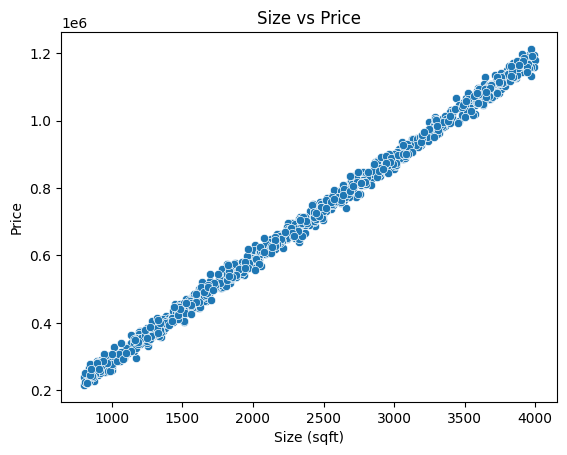

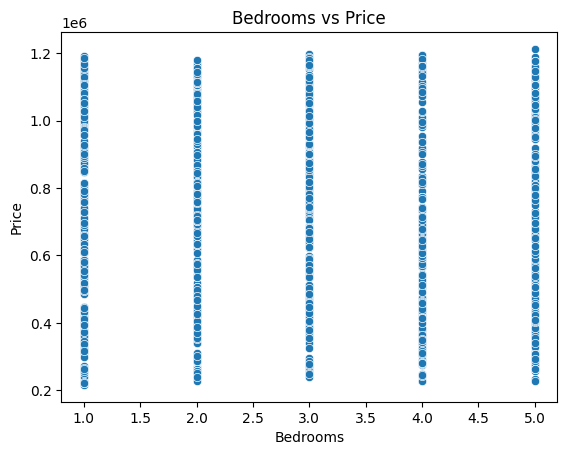

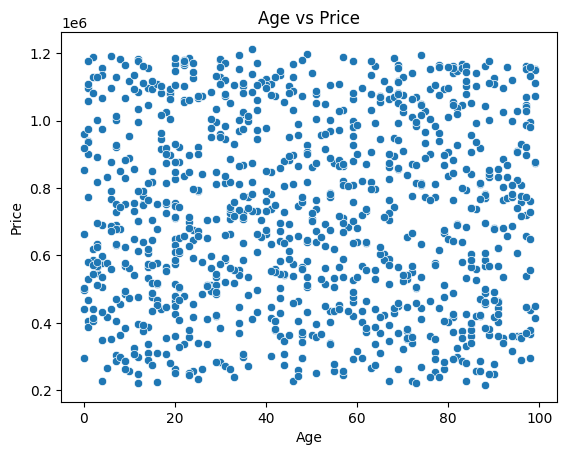

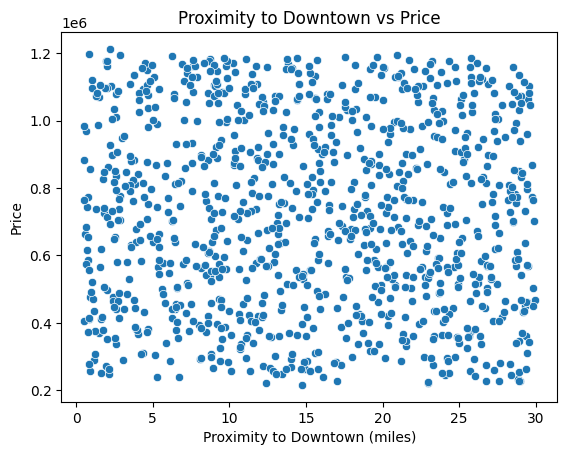

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plots
sns.scatterplot(x='Size (sqft)', y='Price', data=data)
plt.title('Size vs Price')
plt.show()

sns.scatterplot(x='Bedrooms', y='Price', data=data)
plt.title('Bedrooms vs Price')
plt.show()

sns.scatterplot(x='Age', y='Price', data=data)
plt.title('Age vs Price')
plt.show()

sns.scatterplot(x='Proximity to Downtown (miles)', y='Price', data=data)
plt.title('Proximity to Downtown vs Price')
plt.show()

#**2. Data Preprocessing**


**Finding Missing Values**

In [3]:
# Check for missing values
print(data.isnull().sum())

Size (sqft)                      0
Bedrooms                         0
Age                              0
Proximity to Downtown (miles)    0
Price                            0
dtype: int64


**Normalization**

In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data[['Size (sqft)', 'Age', 'Proximity to Downtown (miles)', 'Price']] = scaler.fit_transform(data[['Size (sqft)', 'Age', 'Proximity to Downtown (miles)', 'Price']])
data = pd.get_dummies(data, columns=['Bedrooms'], drop_first=True)

#**3. Model Development**

**Multiple Regression**

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Define features and target variable
X = data.drop('Price', axis=1)
y = data['Price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

**Feature Selection**

In [7]:
import numpy as np

# Get coefficients
coefficients = model.coef_
features = X.columns
importance = np.abs(coefficients)
feature_importance = pd.DataFrame({'Feature': features, 'Importance': importance})
print(feature_importance.sort_values(by='Importance', ascending=False))

                         Feature  Importance
0                    Size (sqft)    1.000564
6                     Bedrooms_5    0.065556
5                     Bedrooms_4    0.052760
4                     Bedrooms_3    0.033317
2  Proximity to Downtown (miles)    0.030347
1                            Age    0.021762
3                     Bedrooms_2    0.012526


#**4. Model Evaluation**




**Metrics**

In [8]:
from sklearn.metrics import mean_squared_error, r2_score

# Predictions
y_pred = model.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.0012883283856527875
R-squared: 0.9986320356482732


**Prediction**

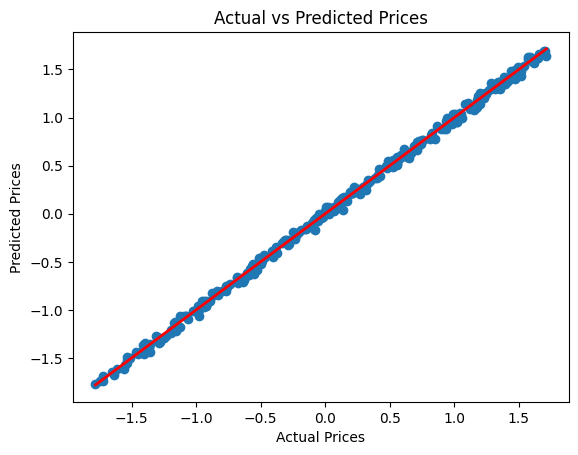

In [9]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.show()

#**Report**



This report details the creation of a predictive model for estimating house prices using features like size, bedrooms, age, and proximity to downtown. The data underwent preprocessing steps such as handling missing values, normalization, and encoding categorical variables. The model development phase included defining features, conducting a train-test split, implementing multiple regression, and evaluating performance with metrics like Mean Squared Error and R-squared.

Challenges encountered during model development included handling outliers, addressing feature multicollinearity, and avoiding overfitting. Strategies like log transformation, VIF analysis, and regularization techniques were employed to mitigate these challenges.

The multiple regression model successfully predicted house prices, offering value to real estate professionals and clients seeking accurate price estimates. Future improvements may involve incorporating additional features like neighborhood characteristics to enhance predictive accuracy.

Visualizations and statistical analyses provided insights into the model's performance, reinforcing its robustness and reliability. Overall, the report highlights the significance of the developed model in aiding decision-making in real estate transactions and underscores the potential for further enhancements in predictive capabilities.
